In [1]:
from glob import glob 
#file_list = glob("P" + "*.*", recursive = True)
file_list = glob("./Ossipee_Pine_Barrens_Jun2015_swath_refl_VIs/" + "*_*_at-sensor_refl_L1G",recursive = True)
for i in file_list:
    print("Element: " + i)
# print("List of filenames:", file_list)

Element: ./Ossipee_Pine_Barrens_Jun2015_swath_refl_VIs/Ossipee_Pine_Barrens_Jun2015_0_at-sensor_refl_L1G
Element: ./Ossipee_Pine_Barrens_Jun2015_swath_refl_VIs/Ossipee_Pine_Barrens_Jun2015_1_at-sensor_refl_L1G
Element: ./Ossipee_Pine_Barrens_Jun2015_swath_refl_VIs/Ossipee_Pine_Barrens_Jun2015_3_at-sensor_refl_L1G
Element: ./Ossipee_Pine_Barrens_Jun2015_swath_refl_VIs/Ossipee_Pine_Barrens_Jun2015_2_at-sensor_refl_L1G


In [2]:
import os
print("The size of", file_list[0], " is ", 
      os.path.getsize (file_list[0]), "bytes.")

The size of ./Ossipee_Pine_Barrens_Jun2015_swath_refl_VIs/Ossipee_Pine_Barrens_Jun2015_0_at-sensor_refl_L1G  is  801648000 bytes.


In [3]:
import pandas as pd
metadata_list = glob("./Ossipee_Pine_Barrens_Jun2015_swath_refl_VIs/" + "*_*_at-sensor_refl_L1G.hdr")
header_info = pd.read_table(metadata_list[0], header=None)
# header_info = pd.read_table(file_list[1], header=None)
header_info.columns = ["metadata"]
print(header_info)

                                             metadata
0                                                ENVI
1                                     description = {
2   NASA G-LiHT, Ossipee_Pine_Barrens_Jun2015, Tra...
3                                      samples = 1815
4                                      lines   = 4758
5                                       bands   = 114
6                                   header offset = 0
7                           file type = ENVI Standard
8                                       data type = 2
9                                    interleave = bsq
10                              sensor type = Unknown
11                                     byte order = 0
12  map info = {UTM, 1.000, 1.000, 324568.912, 485...
13  coordinate system string = {PROJCS["UTM_Zone_1...
14                         default bands = {54,33,15}
15                      wavelength units = Nanometers
16  z plot titles = {Wavelength (nm), Reflectance ...
17                      defa

In [4]:
#print(metadata_list[0])
print(file_list[0])

./Ossipee_Pine_Barrens_Jun2015_swath_refl_VIs/Ossipee_Pine_Barrens_Jun2015_0_at-sensor_refl_L1G


In [5]:
##!pip install spectral
from spectral import *

In [6]:
# img = envi.open(file_list[1], )
# img1 = envi.open(file_list[3], )
# img2 = envi.open(file_list[5], )
img = envi.open(metadata_list[0], )
img1 = envi.open(metadata_list[1], )
img2 = envi.open(metadata_list[2], )

In [7]:
print(img.shape)
print(img1.shape)
print(img2.shape)

(4758, 1815, 114)
(3931, 718, 114)
(4731, 1319, 114)


In [8]:
#Inspect individual pixel
print(img[500,700,6])
print(img1[500,700,6])
print(img2[500,700,6])

0
0
0


In [9]:
#Load image as an array
arr = img.load()
arr1 = img1.load()
arr2 = img2.load()

In [10]:
import numpy as np
#Subsample image for faster processing
arr = arr[::3,::3,:]
arr.shape

arr1 = arr1[::3,::3,:]
arr1.shape

arr2 = arr2[::3,::3,:]
arr2.shape




(1577, 440, 114)

In [11]:
print(header_info["metadata"][18])

wavelength = {


In [12]:
#Functions for working with images
import cv2
import matplotlib.pyplot as plt
import numpy as np

# def show_image(img1,img2,img3):
def show_image(img1):
    fig1, ax1 = plt.subplots(figsize=(5, 5))
    ax1.imshow(img1, cmap = 'gray')
    # ax1.imshow(img2, cmap = 'gray')
    # ax1.imshow(img3, cmap = 'gray')

def increase_brightness(img, value=80):
    img = img.astype(np.uint8)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

def create_rgb(hyper_cube):
    rgb_image = hyper_cube[:,:,[53,31,8]]
    rgb_image = cv2.normalize(rgb_image, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    rgb_image = rgb_image.astype(np.uint8)
    rgb_image = increase_brightness(rgb_image)
    return rgb_image

In [37]:
def spectralSlicing(img):
    #declaring variables
    inBounds = True
    x,y = 0,0
    ret = []
#     print(img.shape)
    while(inBounds):
        #slice 240 pixels in x and y and then take all 114 wavelengths 
        frame = img[x:(x+240),y:(y+240),:]
        if(frame.any() != 0): #if the Frame is blank, don't append it
            ret.append(frame)
#         print(frame.shape)
        #indexing and edge detection
        x += 240
        if((x+240) > img.shape[0]):
            x = 0
            y += 240
            if((y+240) > img.shape[1]):
                inBounds = False
#    print(len(ret))
    return ret

In [39]:
miniframes = spectralSlicing(img1)

/tmp/ipykernel_12581/1371991201.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(figsize=(5, 5))


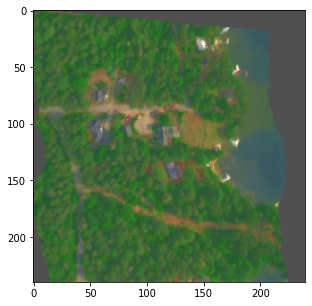

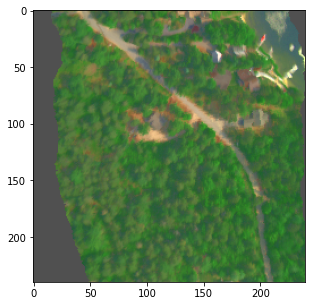

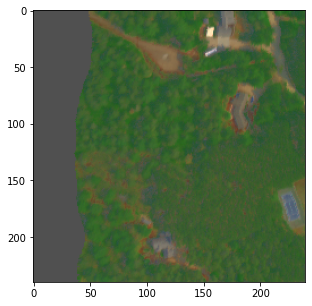

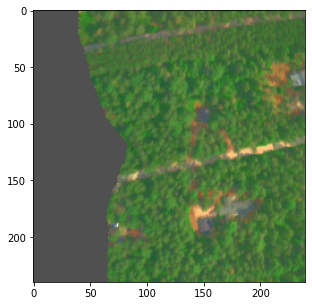

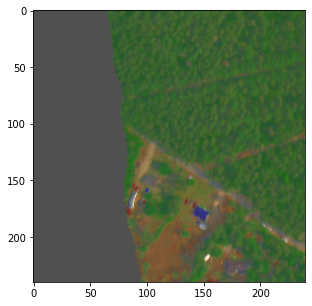

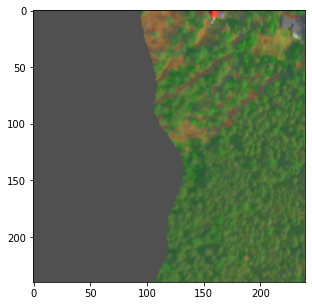

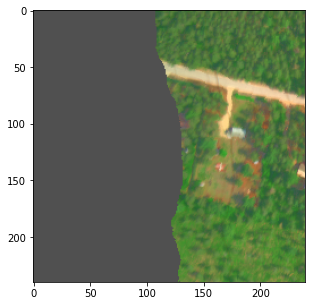

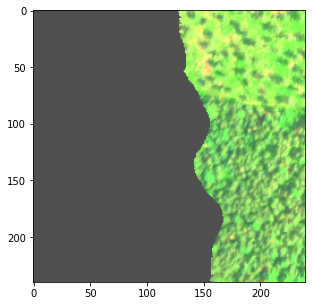

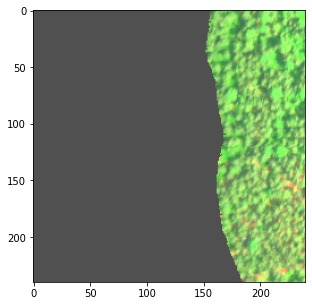

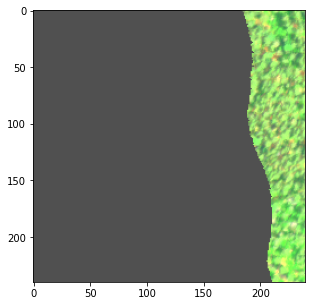

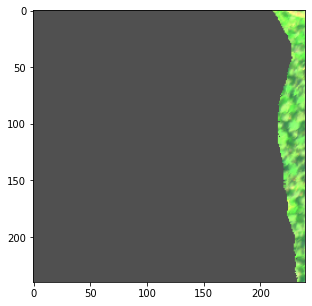

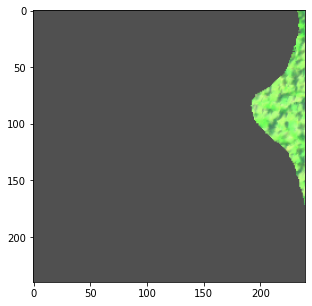

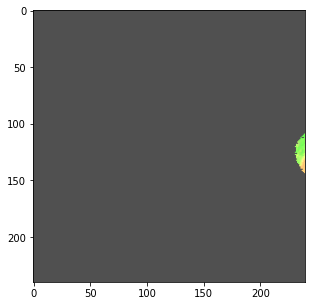

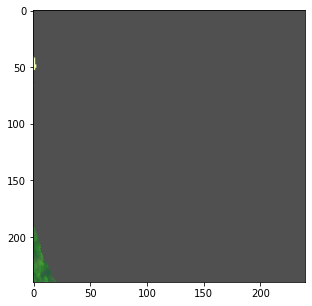

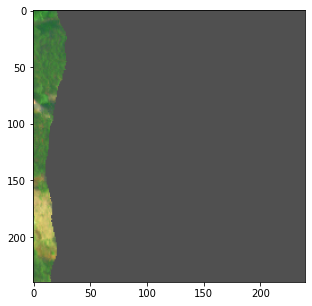

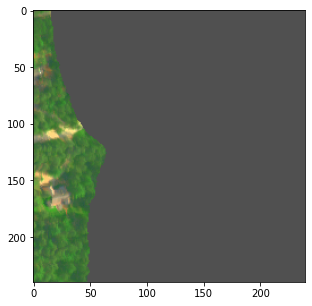

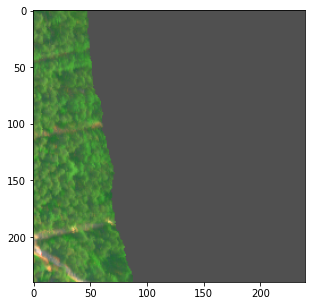

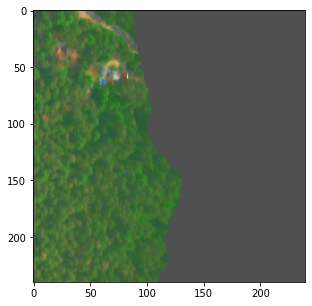

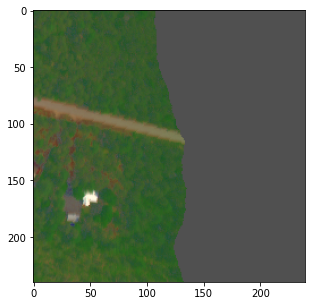

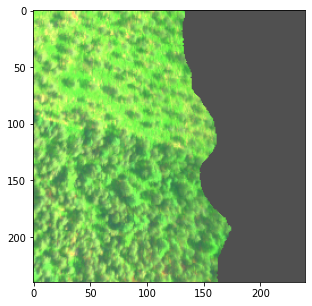

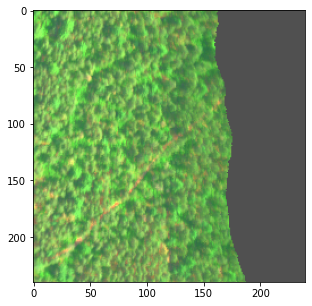

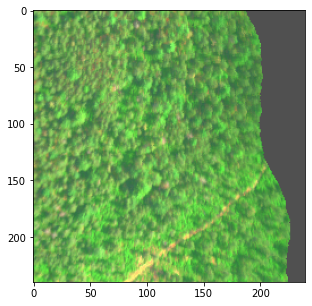

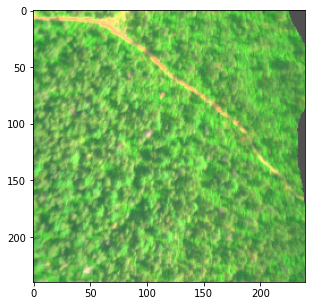

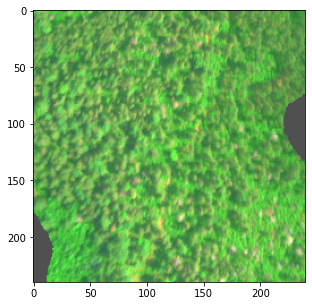

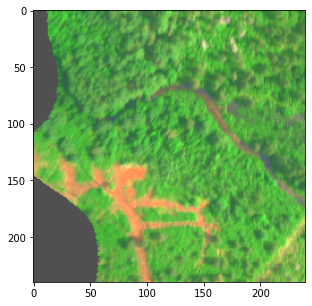

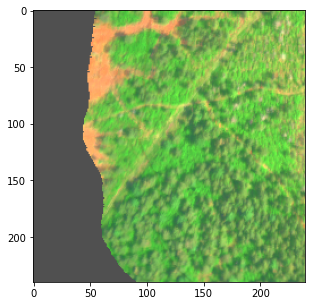

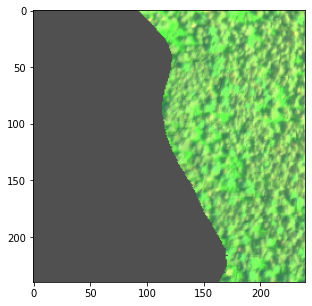

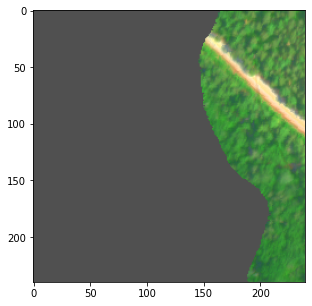

In [40]:
for i in range(len(miniframes)):
    frame = create_rgb(miniframes[i])
    show_image(frame)

The dimensions of the RGB image are: (1586, 605, 3)
The dimensions of the RGB image are: (1311, 240, 3)
The dimensions of the RGB image are: (1577, 440, 3)


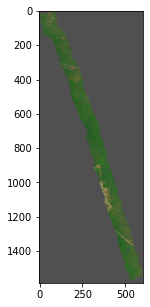

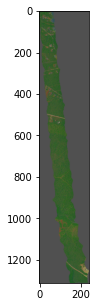

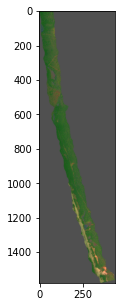

In [16]:
#Create RGB image and display it
rgb_img = create_rgb(arr) 
rgb_img1 = create_rgb(arr1) 
rgb_img2 = create_rgb(arr2) 
print("The dimensions of the RGB image are:", rgb_img.shape)
print("The dimensions of the RGB image are:", rgb_img1.shape)
print("The dimensions of the RGB image are:", rgb_img2.shape)
# show_image(rgb_img,rgb_img1,rgb_img2)
show_image(rgb_img)
show_image(rgb_img1)
show_image(rgb_img2)

